In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

adult_data = pd.read_csv('../data/adult_data.csv')
adult_data


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
# Remove rows with question marks in them.
adult_data = adult_data[adult_data.workclass != ' ?']
adult_data = adult_data[adult_data.occupation != ' ?']
adult_data = adult_data[adult_data.nativecountry != ' ?']

# Remove dot from incomes with a dot
adult_data.loc[adult_data['income'] == ' >50K.', 'income'] = ' >50K'
adult_data.loc[adult_data['income'] == ' <=50K.', 'income'] = ' <=50K'

# Income greater than 50K is 1
adult_data.loc[adult_data['income'] == ' >50K', 'income'] = 1

# Income less than 50K is 0
adult_data.loc[adult_data['income'] == ' <=50K', 'income'] = 0



# adult_data['education'] = adult_data.cc.cat.codes


In [5]:
# One-hot encode categorical columns
x = pd.get_dummies(data=adult_data,columns=['workclass','education','maritalstatus','occupation','relationship','race','nativecountry'])

In [6]:
display(x)

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,77516,13,Male,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,Male,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0

In [7]:

# # Remove dot from incomes with a dot
# x.loc[x['income'] == ' >50K.', 'income'] = ' >50K'
# x.loc[x['income'] == ' <=50K.', 'income'] = ' <=50K'

# # Income greater than 50K is 1
# x.loc[x['income'] == ' >50K', 'income'] = 1

# # Income less than 50K is 0
# x.loc[x['income'] == ' <=50K', 'income'] = 0

# Female is 1
x.loc[x['sex'] == ' Female', 'sex'] = 1

# Male is 0
x.loc[x['sex'] == ' Male', 'sex'] = 0


In [8]:
x

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [9]:
x.groupby('income').count()

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014
1,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208


In [22]:
adult_data_export = np.array(x)
adult_data_export

%store adult_data_export

Stored 'adult_data_export' (ndarray)


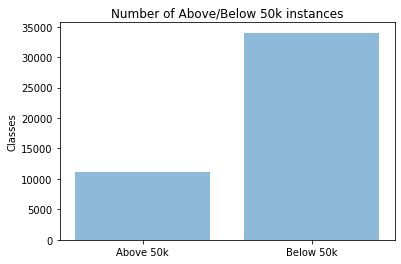

In [11]:
classes = ('Above 50k', 'Below 50k')
y_pos = np.arange(len(classes))
num_above = np.count_nonzero(adult_data_export[:,7]==1)
num_below = np.count_nonzero(adult_data_export[:,7]==0)
num = [num_above, num_below]

plt.bar(y_pos, num, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Classes')
plt.title('Number of Above/Below 50k instances')

plt.show()

Text(0, 0.5, 'Income')

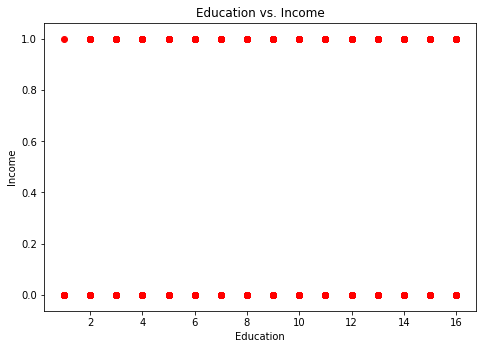

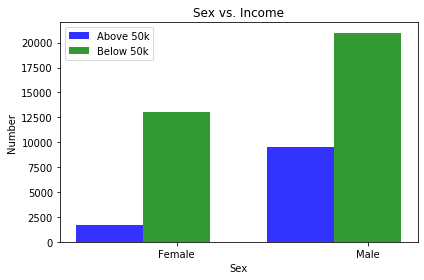

In [16]:
n_groups = 2

female_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==1, adult_data_export[:,3]==1))
female_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==0, adult_data_export[:,3]==1))
male_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==1, adult_data_export[:,3]==0))
male_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==0, adult_data_export[:,3]==0))
num_above50k = (female_above50k, male_above50k)
num_below50k = (female_below50k, male_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Sex')
plt.ylabel('Number')
plt.title('Sex vs. Income')
plt.xticks(index + bar_width, ('Female', 'Male'))
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'r_value' is not defined

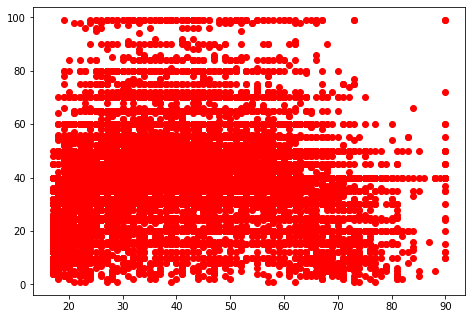

In [19]:
age = adult_data_export[:, 0] # age 
hours_per_week = adult_data_export[:, 6] # hours per week 
y_pos = np.arange(len(age))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(age, hours_per_week, color='r')
# ax.scatter(x3, x4, color='g')
# ax.scatter(x5, x6, color='b')
# ax.legend(('data', 'line-regression r={}'.format(r_value)), 'best')


ax.set_title('Age vs. Hours per Week')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per week')


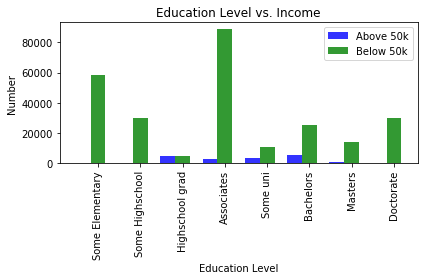

In [21]:
n_groups = 8 

# 1st - 4th grade
someelem_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,18]==1, adult_data_export[:,3]==1))
someelem_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,18]==0, adult_data_export[:,3]==1))

#5th - 6th grade 
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,19]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,19]==0, adult_data_export[:,3]==1))

# 7th - 8th grade 
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,20]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,20]==0, adult_data_export[:,3]==1))

# preschool
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,28]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,28]==0, adult_data_export[:,3]==1))

#10th
somehs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,15]==1, adult_data_export[:,3]==0))
somehs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,15]==0, adult_data_export[:,3]==0))

#11th
somehs_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,16]==1, adult_data_export[:,3]==0))
somehs_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,16]==0, adult_data_export[:,3]==0))

#12th
somehs_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,17]==1, adult_data_export[:,3]==0))
somehs_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,17]==0, adult_data_export[:,3]==0))

#9th
somehs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,21]==1, adult_data_export[:,3]==0))
somehs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,21]==0, adult_data_export[:,3]==0))

#hs grad
hs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,26]==1, adult_data_export[:,3]==1))
hs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,26]==0, adult_data_export[:,3]==1))

#assoc-acdm
assoc_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,22]==1, adult_data_export[:,3]==0))
assoc_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,22]==0, adult_data_export[:,3]==0))

#assoc-voc
assoc_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,23]==1, adult_data_export[:,3]==0))
assoc_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,23]==0, adult_data_export[:,3]==0))

#prof-school
assoc_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,29]==1, adult_data_export[:,3]==0))
assoc_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,29]==0, adult_data_export[:,3]==0))

#some college
someuni_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,30]==1, adult_data_export[:,3]==1))
someuni_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,30]==0, adult_data_export[:,3]==1))

#bachelors
bach_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,24]==1, adult_data_export[:,3]==0))
bach_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,24]==0, adult_data_export[:,3]==0))

#masters
masters_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,27]==1, adult_data_export[:,3]==1))
masters_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,27]==0, adult_data_export[:,3]==1))

#doctors
doctor_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,25]==1, adult_data_export[:,3]==0))
doctor_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,25]==0, adult_data_export[:,3]==0))

num_above50k = (someelem_above50k, somehs_above50k, hs_above50k, assoc_above50k, 
                someuni_above50k, bach_above50k, masters_above50k, doctor_above50k)
num_below50k = (someelem_below50k, somehs_below50k, hs_above50k, assoc_below50k,
               someuni_below50k, bach_below50k, masters_below50k, doctor_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Education Level')
plt.ylabel('Number')
plt.title('Education Level vs. Income')
plt.xticks(index + bar_width, ('Some Elementary', 'Some Highschool', 'Highschool grad', 'Associates', 'Some uni',
                              'Bachelors', 'Masters', 'Doctorate'), rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()
